<a href="https://colab.research.google.com/github/vnikeshana/ML_Q5_sales_forecast/blob/main/MLQ5_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pickle
import copy
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls /content/drive/My\ Drive/MSC/ML

df_syn_eng.csv	outlet_info.csv  test_data.csv	training_data.csv


In [4]:
file_path = '/content/drive/My Drive/MSC/ML/outlet_info.csv'
df = pd.read_csv(file_path)

In [5]:
df.head(12)

,store,profile,size
0,ABC,Moderate,Medium
1,XYZ,High,Large


In [7]:
file_path2 = '/content/drive/My Drive/MSC/ML/training_data.csv'
df2 = pd.read_csv(file_path2)

In [8]:
df2.head(12)

,date_id,item_dept,item_qty,net_sales,store,item,invoice_num
0,11/1/2021,Grocery,1.00,160.00,XYZ,16620,1475459.0
1,11/1/2021,Grocery,2.00,480.00,XYZ,32365,1475459.0
2,11/1/2021,Grocery,1.00,127.00,XYZ,31349,1475459.0
3,11/1/2021,Household,2.00,110.00,XYZ,1266,1475475.0
4,11/1/2021,Household,1.00,150.00,XYZ,114920,1475475.0
5,11/1/2021,Household,1.00,745.00,XYZ,115596,1475475.0
6,11/1/2021,Grocery,1.00,175.00,XYZ,98654,1475475.0
7,11/1/2021,Grocery,3.00,120.00,XYZ,8373,1475475.0
8,11/1/2021,Grocery,1.00,194.00,XYZ,106669,1475521.0
9,11/1/2021,Household,1.00,137.00,XYZ,75008,1475521.0


            item_qty      net_sales          item   invoice_num
count  614098.000000  614098.000000  614098.00000  5.912880e+05
mean        1.533792     335.067969   67622.41479  4.231954e+06
std         3.058092     824.733169   48909.65677  1.704178e+06
min       -59.000000  -15250.000000     906.00000  1.475419e+06
25%         1.000000     124.000000   14340.00000  2.581947e+06
50%         1.000000     215.000000   89725.00000  4.597865e+06
75%         1.668000     371.000000  117021.00000  5.598286e+06
max       880.000000  316880.280000  124146.00000  9.354809e+06


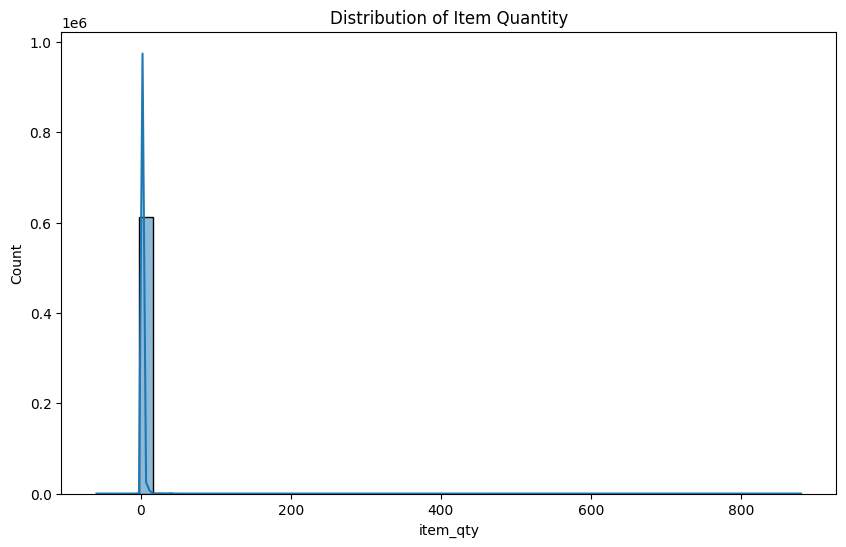

In [9]:
import seaborn as sns

print(df2.describe())

# Plot sales quantity distribution
plt.figure(figsize=(10, 6))
sns.histplot(df2['item_qty'], bins=50, kde=True)
plt.title('Distribution of Item Quantity')
plt.show()

In [15]:
df2['date_id_a'] = pd.to_datetime(df2['date_id'])

min_date = df2['date_id_a'].min()
max_date = df2['date_id_a'].max()

print(f"Date Range: {min_date} to {max_date}")

Date Range: 2021-11-01 00:00:00 to 2022-01-31 00:00:00


In [13]:
df2.head(100)

,date_id,item_dept,item_qty,net_sales,store,item,invoice_num
0,11/1/2021,Grocery,1.000,160.00,XYZ,16620,1475459.0
1,11/1/2021,Grocery,2.000,480.00,XYZ,32365,1475459.0
2,11/1/2021,Grocery,1.000,127.00,XYZ,31349,1475459.0
3,11/1/2021,Household,2.000,110.00,XYZ,1266,1475475.0
4,11/1/2021,Household,1.000,150.00,XYZ,114920,1475475.0
...,...,...,...,...,...,...,...
95,11/6/2021,Beverages,2.000,300.00,XYZ,94497,1476637.0
96,11/6/2021,Grocery,1.148,269.78,XYZ,11578,1476637.0
97,11/6/2021,Beverages,3.000,1125.00,XYZ,5192,1476679.0
98,11/6/2021,Grocery,1.000,40.00,XYZ,91406,1476679.0
